# Setep 4: Feature Engineering

In [193]:
import pandas as pd

#Reading data from step 2
fields = ['Type', 'IE', 'NS', 'FT', 'PJ', 'Posts','Posts_Lemmatized']
mbti_FE = pd.read_pickle('mbti_Dataset2.pkl')
mbti_FE = mbti_FE.filter(fields)
mbti_FE.head()

,Type,IE,NS,FT,PJ,Posts,Posts_Lemmatized
0,INFJ,I,N,F,J,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,"[, moment, sportscenter, top, ten, play, prank..."
1,ENTP,E,N,T,P,'I'm finding the lack of me in these posts ver...,"[finding, lack, post, alarming, sex, boring, p..."
2,INTP,I,N,T,P,'Good one _____ https://www.youtube.com/wat...,"[good, one, course, say, know, blessing, curse..."
3,INTJ,I,N,T,J,"'Dear INTP, I enjoyed our conversation the o...","[dear, enjoyed, conversation, day, esoteric, g..."
4,ENTJ,E,N,T,J,'You're fired.|||That's another silly misconce...,"[fired, another, silly, misconception, approac..."


## 4-1: Add more features to Dataset
* Number of Capital Characters
* Number of Capital Words
* Number of Punctuations
* Number of Words in quotes
* Number of Unique Words
* Number of Stopwords
* Average of Word Lenght
* Unique Words / Number of Words
* Stopwords / Number of Words
* Sentiment Analyzer using NLTK

In [194]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

def remove_URL(text):
    """Remove URL from the input Text"""
    return re.sub(r"http\S+", "", text)

def find_WrCapital(text):
    valid_Capital = ['INFP ', 'INFJ ', 'INTP ', 'INTJ ', 'ENTP ', 'ENFP ', 'ISTP ', 'ISFP ', 'ENTJ ', 'ISTJ ', 'ENFJ ', 'ISFJ ', 'ESTP ', 'ESFP ', 'ESFJ ', 'ESTJ ', 'MBTI ']
    match= re.findall('[A-Z]{3,15}\s{1}', text)
    match = [item for item in match if item not in valid_Capital]
    return(len(match))

def count_Punctuations(text):
    punctuations="!#$%&'()*+,-./:;<=>?@[\]^_`{}~" + '"'
    d=0
    for i in punctuations:
        d+=text.count(i)
    return d 

def count_Words_in_quotes(text):
    x = re.findall(r"(?P<quote>['\"])(?P<string>.*?)(?<!\\)(?P=quote)", text)
    return len(x)

def count_UniqueWords(text):
    text = re.sub(r'[^\w\s]','',text) #Remove Punctuations
    return len(set(text.split()))

def count_Stopwords(text):
    stop_Words = set(stopwords.words('english'))  
    word_Tokens = word_tokenize(text)
    stopwords_X = [w for w in word_Tokens if w in stop_Words]
    return len(stopwords_X)

def sentiment_Score(text):
    sia = SentimentIntensityAnalyzer()
    return(sia.polarity_scores(text).get('compound'))

mbti_FE['No_Characters'] = mbti_FE['Posts'].apply(lambda X: len(remove_URL(X)) - remove_URL(X).count(' '))
mbti_FE['No_Words'] = mbti_FE['Posts'].apply(lambda X: len(remove_URL(X).split()))
mbti_FE['No_Words-Capital'] = mbti_FE['Posts'].apply(lambda X: find_WrCapital(remove_URL(X)))
mbti_FE['No_Punctuations'] = mbti_FE['Posts'].apply(lambda X: count_Punctuations(remove_URL(X)))
mbti_FE['No_WordsInQuotes'] = mbti_FE['Posts'].apply(lambda X: count_Words_in_quotes(remove_URL(X)))
mbti_FE['No_UniqueWords'] = mbti_FE['Posts'].apply(lambda X: count_UniqueWords(remove_URL(X)))
mbti_FE['No_Stopwords'] = mbti_FE['Posts'].apply(lambda X: count_Stopwords(remove_URL(X)))
mbti_FE['Avg_WordLength'] = mbti_FE['No_Characters']/mbti_FE['No_Words']
mbti_FE['UniqueWrd_vs_NoWrd'] = mbti_FE['No_UniqueWords']/mbti_FE['No_Words']
mbti_FE['Stopwords_vs_NoWrd'] = mbti_FE['No_Stopwords']/mbti_FE['No_Words']
mbti_FE['Sentiment_Score'] = mbti_FE['Posts'].apply(lambda X: sentiment_Score(remove_URL(X)))

mbti_FE.head()

,Type,IE,NS,FT,PJ,Posts,Posts_Lemmatized,No_Characters,No_Words,No_Words-Capital,No_Punctuations,No_WordsInQuotes,No_UniqueWords,No_Stopwords,Avg_WordLength,UniqueWrd_vs_NoWrd,Stopwords_vs_NoWrd,Sentiment_Score
0,INFJ,I,N,F,J,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,"[, moment, sportscenter, top, ten, play, prank...",2760,548,0,141,9,355,238,5.036496,0.647810,0.434307,0.9805
1,ENTP,E,N,T,P,'I'm finding the lack of me in these posts ver...,"[finding, lack, post, alarming, sex, boring, p...",5241,1166,1,287,26,545,484,4.494854,0.467410,0.415094,0.9993
2,INTP,I,N,T,P,'Good one _____ https://www.youtube.com/wat...,"[good, one, course, say, know, blessing, curse...",4168,833,2,227,15,463,338,5.003601,0.555822,0.405762,0.9983
3,INTJ,I,N,T,J,"'Dear INTP, I enjoyed our conversation the o...","[dear, enjoyed, conversation, day, esoteric, g...",5071,1062,3,294,28,518,469,4.774953,0.487759,0.441620,0.9974
4,ENTJ,E,N,T,J,'You're fired.|||That's another silly misconce...,"[fired, another, silly, misconception, approac...",4717,965,5,232,14,500,436,4.888083,0.518135,0.451813,0.9396


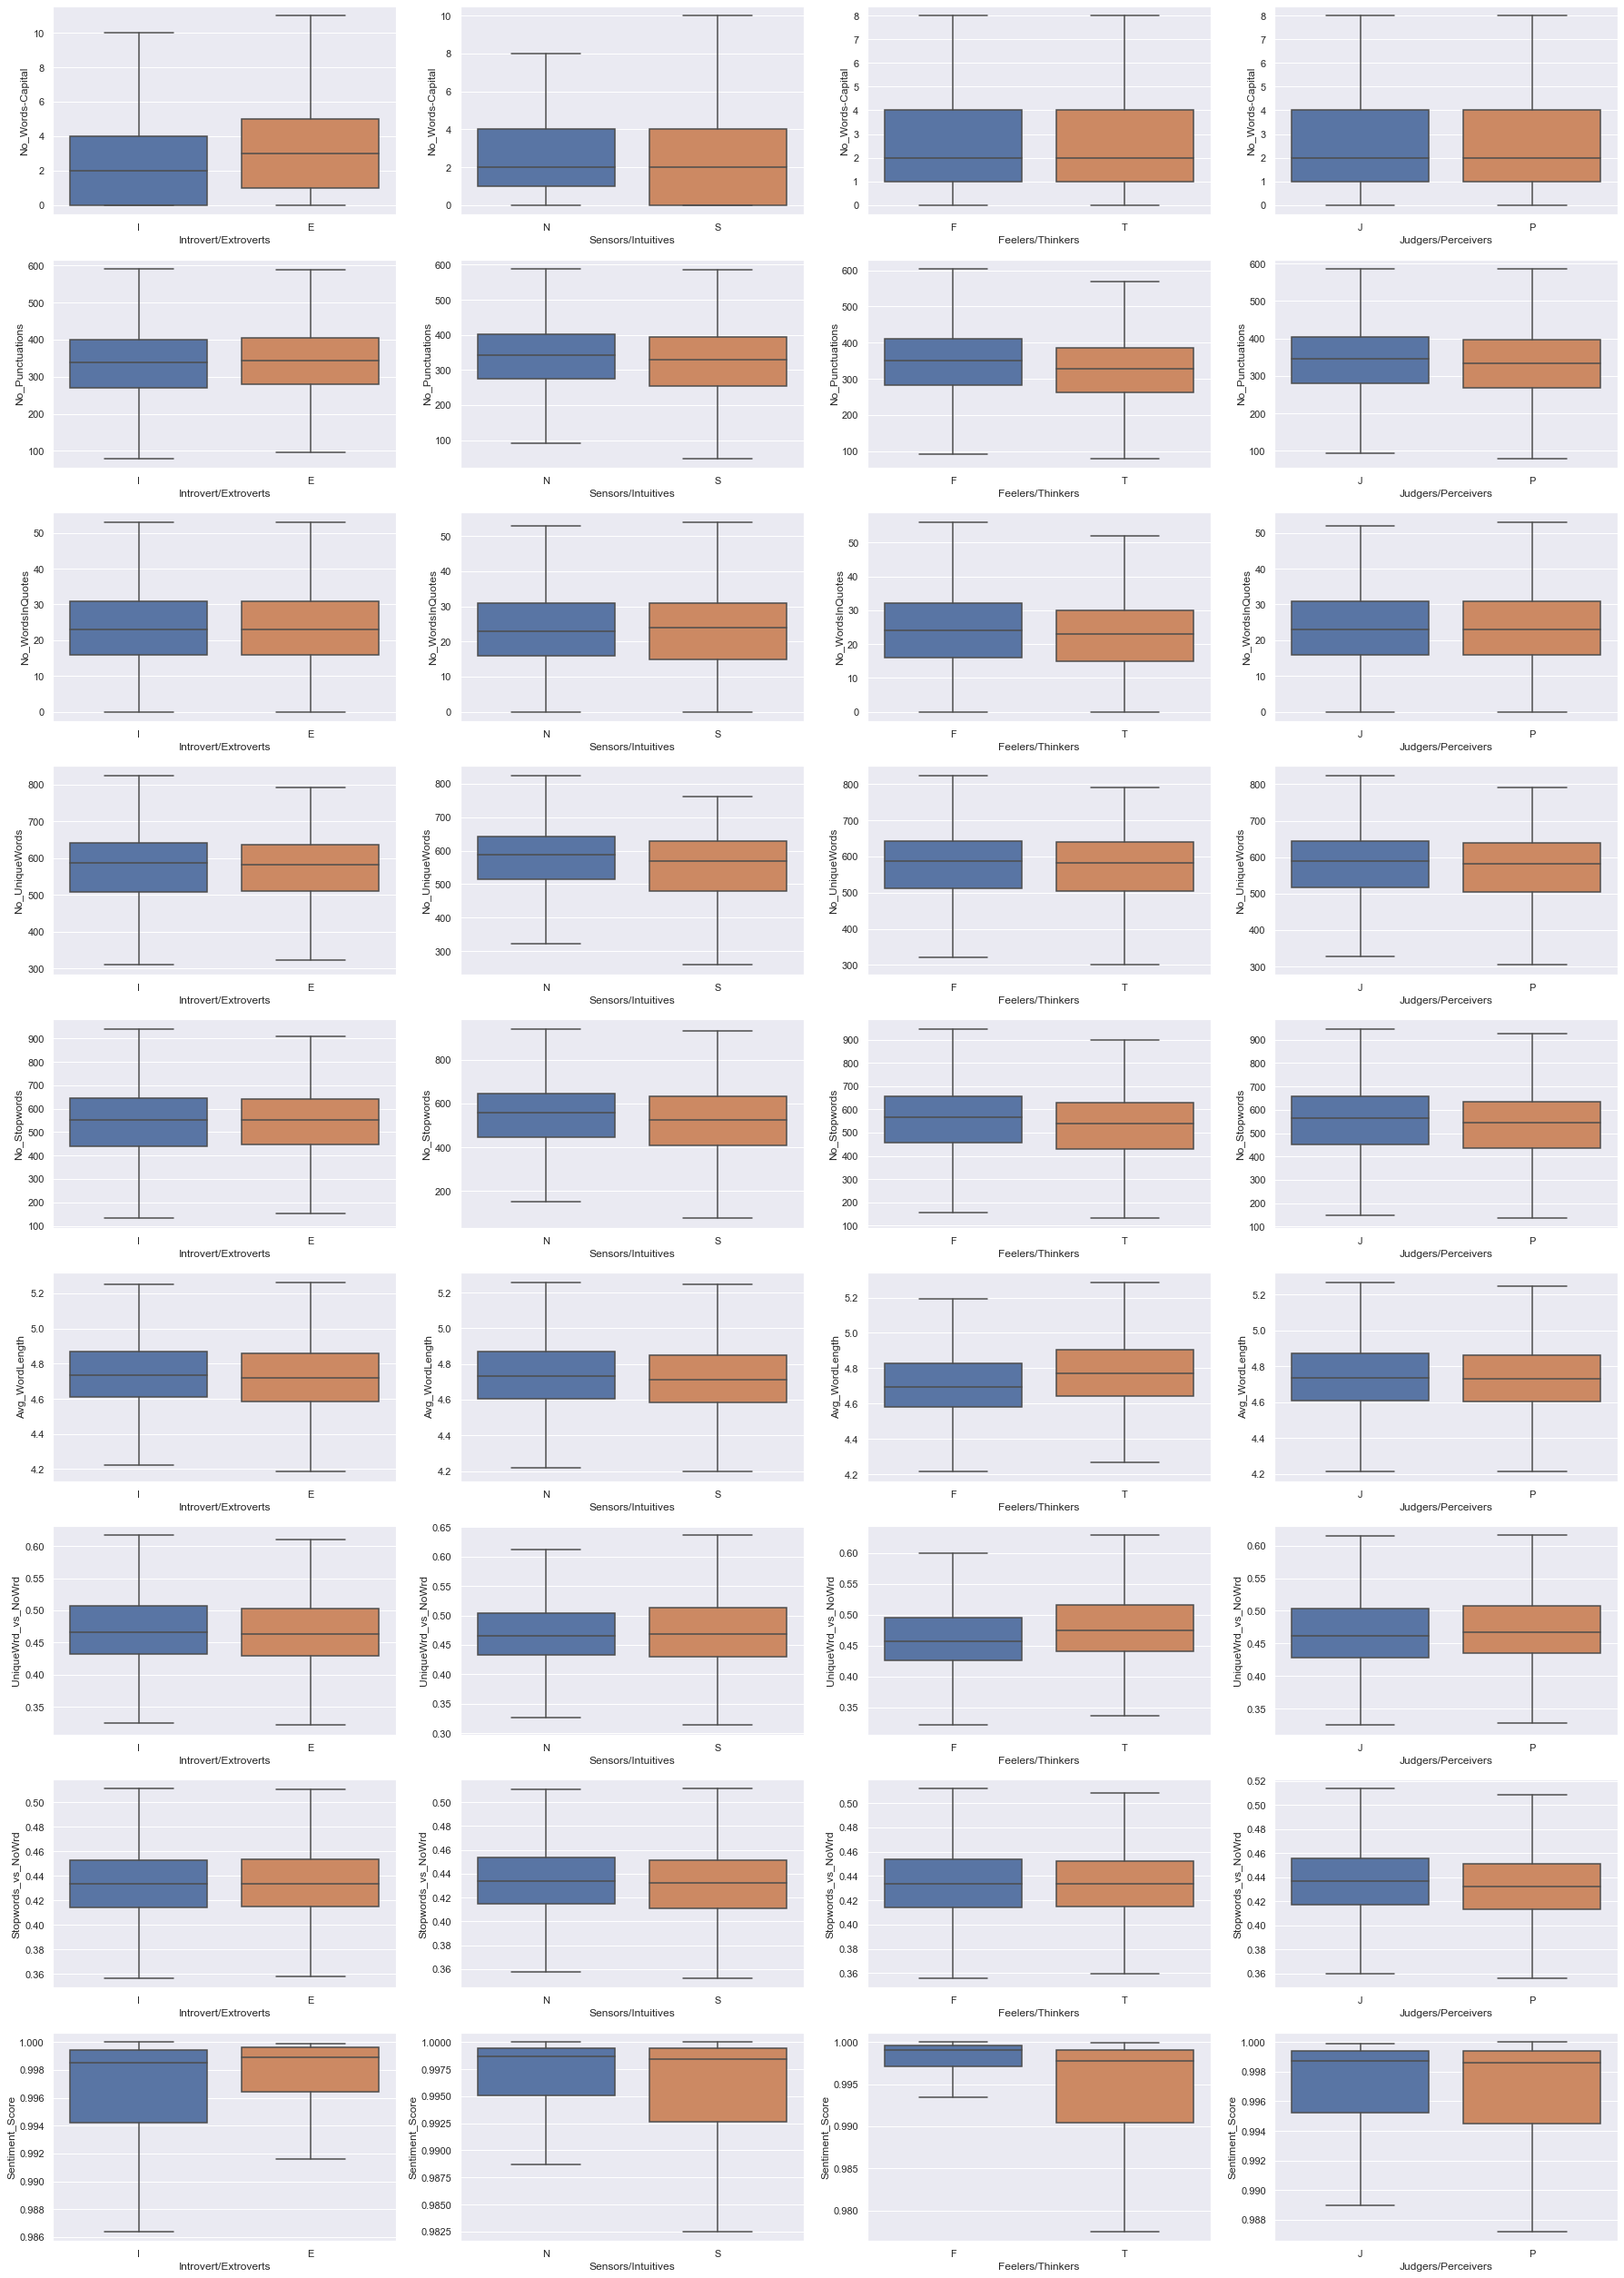

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

feature_List = ['No_Words-Capital', 'No_Punctuations', 'No_WordsInQuotes', 'No_UniqueWords', 'No_Stopwords', 
                'Avg_WordLength', 'UniqueWrd_vs_NoWrd', 'Stopwords_vs_NoWrd','Sentiment_Score']

fig, ax = plt.subplots(len(feature_List),4, figsize=(25,35))
mbti_FE[feature_List] = mbti_FE[feature_List].astype(float)

sns.set(style="darkgrid")

for i, feature in enumerate(feature_List):
    sns.boxplot(data = mbti_FE, x='IE', y=feature, ax=ax[i,0], showfliers=False).set(xlabel='Introvert/Extroverts')
    sns.boxplot(data = mbti_FE, x='NS', y=feature, ax=ax[i,1], showfliers=False).set(xlabel='Sensors/Intuitives')
    sns.boxplot(data = mbti_FE, x='FT', y=feature, ax=ax[i,2], showfliers=False).set(xlabel='Feelers/Thinkers')
    sns.boxplot(data = mbti_FE, x='PJ', y=feature, ax=ax[i,3], showfliers=False).set(xlabel='Judgers/Perceivers')

plt.tight_layout() 
plt.show()


In [197]:
#Save new features information 
fields = ['Type', 'IE', 'NS', 'FT', 'PJ', 'Posts','Posts_Lemmatized']
New_feature = ['No_Words-Capital', 'No_WordsInQuotes', 'Avg_WordLength', 'UniqueWrd_vs_NoWrd', 'Sentiment_Score']
feature_List = fields + New_feature


#Removing '' from the the dataset
#condition = False
#while condition == False:
#    condition = True
#    for i in mbti_FE.Posts_Lemmatized:
#        if '' in i:
#            i.remove('')
#    for i in mbti_FE.Posts_Lemmatized:
#        if '' in i:
#            condition = False
#
#mbti_FE['Avg_WordLength'] = mbti_FE['Avg_WordLength'].apply(lambda x: round(x,2))#Round Avg_WordLength
#mbti_FE['UniqueWrd_vs_NoWrd'] = mbti_FE['UniqueWrd_vs_NoWrd'].apply(lambda x: round(x,2))#UniqueWrd_vs_NoWrd
#mbti_FE['Sentiment_Score'] = mbti_FE['Sentiment_Score'].apply(lambda x: round(x,2))#UniqueWrd_vs_NoWrd



mbti_FE[feature_List].to_pickle('mbti_FE.pkl')